<a href="https://colab.research.google.com/github/practice404/deep-learning/blob/master/linear_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [156]:
data = pd.read_csv('data.csv', names=['X','Y','Label'])
data.head()

,X,Y,Label
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [157]:
X = data[['X','Y']].values
label = data['Label'].values

In [158]:
def prediction(X, W, b):
    t = (((np.matmul(X,W))+b)[0]) # solving linear equation
    if t >= 0:
        return 1
    return 0

In [159]:
def perceptron_algo(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        pred = prediction(X[i],W,b)
        if y[i] == 1 and pred == 0:
            for n in range(len(W)):
                W[n] += X[i][n]*learn_rate
            b += learn_rate
        if y[i] == 0 and pred == 1:
            for n in range(len(W)):
                W[n] -= X[i][n]*learn_rate 
            b -= learn_rate
    
    return W, b

In [160]:
def begin(X,label,learn_rate = 0.01, rounds=50):
  x_min, x_max = X.T[0].min(), X.T[0].max()
  y_min, y_max = X.T[1].min(), X.T[1].max()
  W = np.random.rand(2,1)
  b = np.random.rand(1)[0] + x_max

  boundary_lines = []
  for _ in range(rounds):
    W,b = perceptron_algo(X, label, W, b, learn_rate)
    boundary_lines.append((-W[0]/W[1], -b/W[1]))
  return boundary_lines

In [161]:
line_data = begin(X,label)

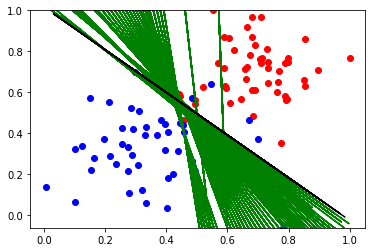

In [162]:
x_0 = data[data['Label'] == 0][['X','Y']].values
x_1 = data[data['Label'] == 1][['X','Y']].values

plt.scatter(x = x_0.T[0], y=x_0.T[1],c="red")
plt.scatter(x = x_1.T[0], y=x_1.T[1],c="blue")
for i in range(len(line_data)):
  if i == len(line_data) - 1:
    color = 'black'
  else:
    color = 'green'
  slope,intercept = line_data[i]
  axes = plt.gca()
  axes.set_ylim([y_min,y_max])
  x_vals = np.random.rand(25)
  y_vals = intercept[0] + slope[0] * x_vals
  plt.plot(x_vals, y_vals,c=color)